## Ch3 lab: linear regression 

### 1 Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math # imports the built-in Python math library for mathematical operations.
import statsmodels.api as sm # statsmodels provides functions for regression analysis, time series analysis, and other statistical models.
import statsmodels.formula.api as smf #  imports the formula API of statsmodels for specifying statistical models using R-style formulas.
from statsmodels.stats.outliers_influence import variance_inflation_factor # the var. function is used to detect multicollinearity in regression models.
from statsmodels.graphics.regressionplots import * #  imports all functions from the statsmodels regressionplots module for plotting regression models.
from sklearn import datasets, linear_model # imports the datasets and linear_model modules from the scikit-learn library for machine learning in Python.
from patsy import dmatrices # imports the dmatrices function from the Patsy library for specifying statistical models using R-style formulas.

In [2]:
boston = pd.read_csv('data/Boston.csv', header = 0, index_col = 0) # no default MASS module or link to ISLR2 datasets, so importing boston dataset via csv

### 2 Simple linear regression

First examine the data... 

In [3]:
list(boston) # lists out the columns in the boston dataset 

['crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rm',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'lstat',
 'medv']

In [4]:
boston.head() # checking / viewing the dataframe 

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [5]:
boston.shape # looking at total rows and columns

(506, 13)

In [7]:
lm = smf.ols ('medv~lstat', data = boston).fit() # using the statsmodels library to fit a linear regression model.

# fitting an ordinary least squares (OLS) regression model
# the function 'smf.ols()' specifies the OLS regression model 
# the formula for the model is 'medv~lstat', meaning 'medv' is the dependent variable and 'lstat' is the independent variable
# the argument 'data = boston' specifies that the data for the regression model is to be taken from the boston dataset
# the method '.fit()' fits the OLS regression model to the data specified in the formula and data arguments
# the resulting fitted model is stored in the 'lm' variable.

In [8]:
print(lm.summary()) # prints a summary of the linear regression model


                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           5.08e-88
Time:                        09:36:45   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

#### Notes on interpretation of this model:

#### R-squared: proportion of variation in dependent variable explained by independent variable(s)

- 1 = strong correlation, 0 = weak correlation
- In this case, R-squared is 0.544, indicating that 54.4% of variability in 'medv' (dependent variable) is explained by 'lstat' (independent variable)
- In other words, the model with the 'lstat' as the predictor explains approx 54.4% of variance in the 'medv'
- R-squared of 0.544 means that there is still a significant amount of variance in 'medv' that is not explained by 'lstat', indicating that other factors may be influencing 'medv' too. Therefore the model may not be the best fit if other important variables are excludes from the analysis

#### Coefficients: the coefficient for the independent variable(s) provides estimates slope for the regression line
 
- Represents expected change in 'medv' for a one-unit increase in 'lstat'
- Can be a positive or negative value 
- 'lstat' coefficient of -0.9500 indicates that as 'lstat' increases, 'medv' tends to decrease
- In context, this says that as the percentage of lower status of the population ('lstat') increases, the median value of owner-occupied homes ('medv') tends to decrease. E.g. areas with a higher percentage of lower status residents may have lower home values/

#### Standard error: measures the precision / accuracy of the coefficient estimate

- A lower standard error indicates a more reliable / accurate estimate, e.g. it is expected to vary less on re-estimation
- A standard error for the 'lstat' coefficient estimate of -0.9500 means that it is expected to vary by about 0.039 on average if the model is re-estimated with a different sample of data from the population.
- Can also be used to compute the confidence interval, e.g. 95% confidence interval for 'lstat' coefficient of -0.9500 would be (1.026, -0.874) which means we can be 95% confident that the true population value of the 'lstat' coefficient lies within this interval 

#### confidence intervals: range of values within which we can be confident that the true value of a coefficient lies

- 95% confidence interval means we are 95% confident that the true value of the coefficient lies within this range 
- As above, can use the standard error to compute the confidence intervals


#### t-value: measures the significance of the coefficient estimate

- Higher t-value indicates a more significant coefficient estimate
- T-value is calculated by dividing the coefficient estimate by the standard error, measuring how many standard errors the coefficient estimate is away from zero
- We don't pay attention to the sign (e.g. whether its a negative / positive number), only the absolute value. In other words, we are interested in the distance of the number from zero, regardless of whether the number is positive or negative.
- T-value of -24.528 for the 'lstat' coefficient estimate indicates it is statistically significant because it is 24.528 standard errors away from 0 
- Overall, this statistic indicates that the 'lstat' variable is a significant predictor of the 'medv' variable, giving us confidence that the negative relationship between 'lstat' and 'medv' is a true reflection of the relationship in the population.


#### p-value: measures the probability that the coefficient estimate is due to change.

- P-value represents the probability of obtaining a test statistic (in this case, t-value) as extreme as or more extreme than the observed one (again, in this case -24.528), assuming that the null hypothesis is true (e.g. that 'lstat' has no effect on 'medv')
- P-value of <0.05 is considered statistically significant, indicating that the coefficient estimate is not likely to be due to chance
- P-value of 0.000 (as in this case) indicates that the 'lstat' coefficient estimate is statistically significant at a very high level of confidence, typically 99% or higher confidence level
- In other words, it is very unlikely that the observed negative relationship between 'lstat' and 'medv' is due to chance or sampling error alone, and more likely to be a true reflection of the relationship in the population
- P-value of 0.000 provides strong evidence to reject the null hypothesis and conclude that 'lstat' is a significant predictor of 'medv' 

In [9]:
dir(lm) # getting a list of all the attributes, methods, and properties that are available for the 'lm' object 

# in this case, 'lm' is an instance of the 'OLS' class from 'statsmodels' library, which has many built-in methods and attributes
# allows you to see all available and choose the ones most relevant for analysis

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abat_diagonal',
 '_cache',
 '_data_attr',
 '_data_in_cache',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'info_c

In [32]:
print(lm.params) # getting the parameters / coefficients of the linear regression model
print(lm.conf_int()) # getting the confidence intervals (upper and lower bound) of the coefficients

Intercept    34.553841
lstat        -0.950049
dtype: float64
                   0          1
Intercept  33.448457  35.659225
lstat      -1.026148  -0.873951


In [10]:
lm.predict(pd.DataFrame({'lstat':[5, 10, 15]})) # generating predictions of 'medv' using 3 new observations of 'lstat'

# Creates a new pandas DataFrame (pd.DataFrame) with a column called 'lstat' and three rows with values of 5, 10, 15
# DataFrame is passed as an argument to the predict() method of the 'lm' object
# This generates predicted values of 'medv' for each row in the DataFrame

0    29.803594
1    25.053347
2    20.303101
dtype: float64

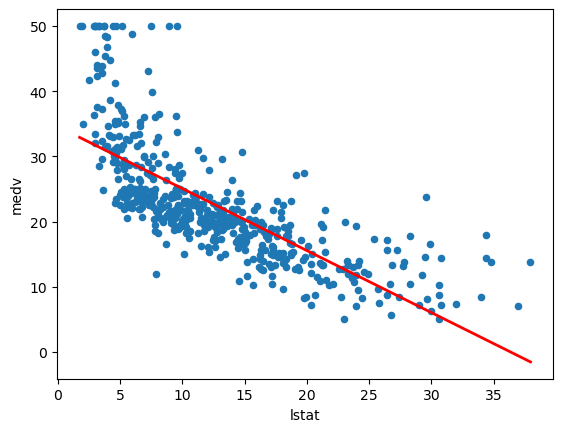

In [11]:
# plotting the fitted line, using only lstat min and max - not sure what this means?

x_new = pd.DataFrame({'lstat': [boston.lstat.min(), boston.lstat.max()]}) # creates new DataFrame with two rows for min and max value in 'lstat'
preds = lm.predict(x_new) # predicts linear regression based on min / max 'lstat' values in the new DataFrame
boston.plot(kind = 'scatter', x = 'lstat', y = 'medv') # creating scatterplot from original boston dataframe
plt.plot(x_new, preds, c = 'red', linewidth = 2) # plotting values from linear regression model
plt.show()

# Using min / max from 'lstat' to create line plot that represents entire range of 'lstat' values in data
# Line plot easily shows relationship between 'lstat' and 'medv' as a straight line
# Line plot helps to visualise overall trend in the data and the accuracy of the linear regression model in capturing that trend

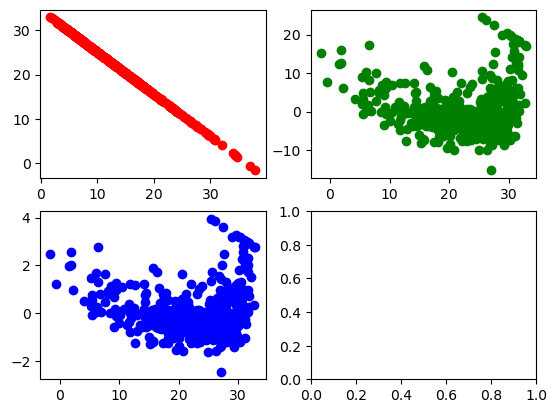

In [12]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2)
ax1.plot(boston.lstat, lm.predict(),'ro') # x-axis = 'lstat', y-axis = predicted values of 'medv' from model
ax2.plot(lm.predict(), lm.resid, 'go') # x-axis = predicted values of 'medv' from model, y-axis = residuals (difference between the actual and predicted values of medv)
ax3.plot(lm.predict(), lm.resid_pearson, 'bo') # x-axis = predicted values of 'medv' from model, y-axis = standardised residuals (residuals divided by their estimated standard deviation)
plt.show()

In [13]:
#  The get_influence() method and the hat matrix diagonal are useful tools for diagnosing potential issues with the linear regression model and improving its accuracy.

dir(lm.get_influence()) # retrieves list of all attributes / methods associated with 'get_influence' of 'lm' object
np.argmax(lm.get_influence().hat_matrix_diag) # calculates index of observation in dataset with highest leverage using the hat matrix diagonal

374

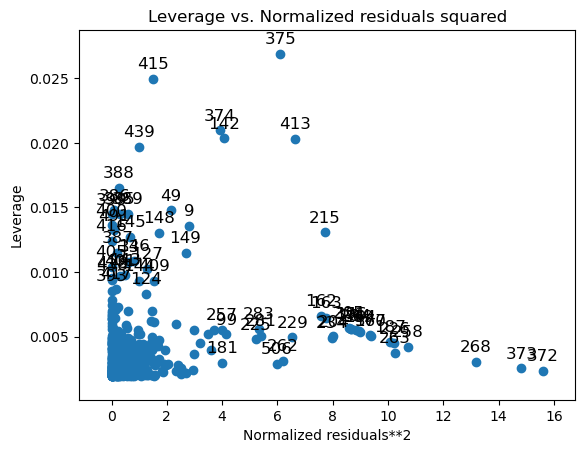

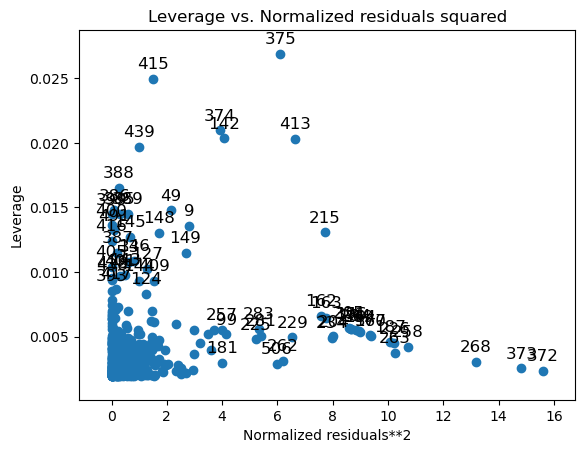

In [14]:
# Creating a plot of the studentized residuals against the leverage values for each observation in the dataset
# Useful for identifying potential outliers and influential observations which may have large impact on regression line and estimated coefficient(s) in model

plot_leverage_resid2(lm)

In [15]:
# Performing simply linear regression using 'LinearRegression()' function from the 'linear_model' module of scikit-learn
# Creates pandas dataframe 'x' containing predictor variable, 'stat', from boston dataset
# Creates pandas series 'y' containing target variable 'medv'
# LinearRegression() function is then used to fit a linear regression model to the data, where x is the predictor variable and y is the target variable
# Results show intercept and coefficient of fitted regression model 

x = pd.DataFrame(boston.lstat)
y = boston.medv
print(x.shape)

model = linear_model.LinearRegression()
model.fit(x, y)
print(model.intercept_)
print(model.coef_)

(506, 1)
34.5538408793831
[-0.95004935]


### 3 Multiple Linear Regression

In [17]:
lm = smf.ols ('medv~lstat+age', data = boston).fit() # still using smg.ols to create a multiple linear regression model 

In [19]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           2.98e-88
Time:                        19:53:07   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

#### Notes on interpretation of this model (focusing on additional variable, 'age'):

#### R-squared: proportion of variation in dependent variable explained by independent variable(s)

- 1 = strong correlation, 0 = weak correlation
- With additional variable, 'age' R-quared has stopped slightly from 0.544 to 0.551
- Indicates that 51.5% of the variability in 'medv' is explained by 'lstat' and 'age' together 
- Given that 'lstat' alone was producing an R-squared of 0.544, it suggests that 'age' isn't having a lot of influence over medv 

#### Coefficients: the coefficient for the independent variable(s) provides estimates slope for the regression line
 
- Represents expected change in 'medv' for a one-unit increase in 'lstat'
- 'age' coefficient of 0.0345 indicates that as 'age' increases so does 'medv'

#### Standard error: measures the precision / accuracy of the coefficient estimate

- A lower standard error indicates a more reliable / accurate estimate, e.g. it is expected to vary less on re-estimation
- The standard error for the 'age' coefficient estimate of 0.0345 means that it is expected to vary by about 0.012 on average if the model is re-estimated with a different sample of data from the population

#### Confidence intervals: range of values within which we can be confident that the true value of a coefficient lies

- 95% confidence interval means we are 95% confident that the true value of the coefficient lies within this range 
- For the age coefficient it is (0.011, 0.059)

#### t-value: measures the significance of the coefficient estimate

- Higher t-value indicates a more significant coefficient estimate
- T-value is calculated by dividing the coefficient estimate by the standard error, measuring how many standard errors the coefficient estimate is away from zero
- We don't pay attention to the sign (e.g. whether its a negative / positive number), only the absolute value. In other words, we are interested in the distance of the number from zero, regardless of whether the number is positive or negative.
- T-value of 2.826 for the 'age' coefficient estimate is small (smaller than the t-value for the 'lstat' variable), however the associated p-value is below <0.05 which signifies that the coefficient for this variable is statistically significant  

#### p-value: measures the probability that the coefficient estimate is due to change.

- P-value represents the probability of obtaining a test statistic (in this case, t-value) as extreme as or more extreme than the observed one (2.826) assuming that the null hypothesis is true (e.g. that 'age' has no effect on 'medv')
- P-value of <0.05 is considered statistically significant, indicating that the coefficient estimate is not likely to be due to chance
- P-value of 0.005 (as in this case) indicates that the 'age' coefficient estimate is statistically significant at a high level of confidence
- In other words, it is very unlikely that the observed negative relationship between 'age' and 'medv' is due to chance or sampling error alone, and more likely to be a true reflection of the relationship in the population

In [22]:
# creating a multiple linear regression model with all variables in the boston dataset

all_columns = "+".join(boston.columns.difference(["medv"])) # creating a string of all variable names in boston dataset apart from 'medv', using difference method to exclude 'medv'
my_formula = "medv~" + all_columns # creating a formula string, saying we want to predict 'medv' using all other variables
lm = smf.ols(my_formula, data=boston).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          2.23e-133
Time:                        20:24:33   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.6173      4.936      8.431      0.0

#### Notes on interpretation:

- Some of the predictor variables have significant coefficients as well, namely "chas", "crim", "dis", "lstat", "nox", "ptratio", "rad", "rm", "tax", and "zn". This means that these variables are significantly associated with the median value of owner-occupied homes in Boston, while controlling for the effects of the other variables in the model.

- On the other hand, the "age" and "indus" variables do not have statistically significant coefficients (P > 0.05), which suggests that they are not significantly associated with the median value of owner-occupied homes in Boston, while controlling for the effects of the other variables in the model.

- Overall, the model seems to fit well as the variables with significant coefficients explain a large amount of the variation in the dependent variable (as indicated by a high R-squared value, 0.734).

### 4 Interaction terms

- An "interaction term" is a variable that represents the product of two or more predictor variables. It is used to model the combined effect of two or more predictor variables on the outcome variable.

- Captures the idea that the relationship between one predictor variable and the outcome variable may depend on the level of another predictor variable. E.g. suppose we are interested in modeling the relationship between height and weight. We might include an interaction term between height and gender to capture the fact that the relationship between height and weight might be different for men and women.

- Including interaction terms in a multiple linear regression model can improve the model's fit to the data by accounting for nonlinear relationships between predictor variables and the outcome variable. 

In [24]:
# we use * to add interaction terms
lm = smf.ols('medv~lstat * age', data=boston).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           4.86e-88
Time:                        20:33:56   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

### 5 Non-linear transformations of the predictors

- Adding a quadratic terms to a regression model to test out and capture any non-linear relationship between the two variables that may be missed in a simple linear regression model.
- A quadratic relationship means that the effect of lstat on medv is not linear, but rather changes as lstat increases or decreases.
- Ways this relationship could manifest include: increasing returns, diminishing returns, inverted U-shaped relationship, U-shaped relationship

In [26]:
lm_order1 = smf.ols('medv~ lstat', data=boston).fit()
lm_order2 = smf.ols('medv~ lstat+ I(lstat ** 2.0)', data=boston).fit() # testing quadratic relationship between 'lstat' and 'medv'
print(lm_order2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          1.56e-112
Time:                        20:36:46   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          42.8620      0.872     

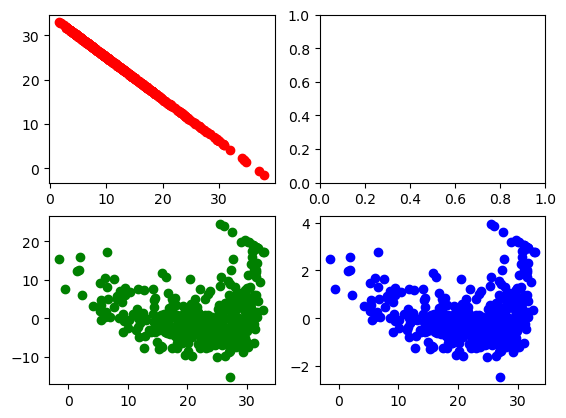

In [27]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2)
ax1.plot(boston.lstat, lm_order1.predict(),'ro')
ax3.plot(lm_order1.predict(), lm_order1.resid, 'go')
ax4.plot(lm_order1.predict(), lm_order1.resid_pearson, 'bo')
plt.show()

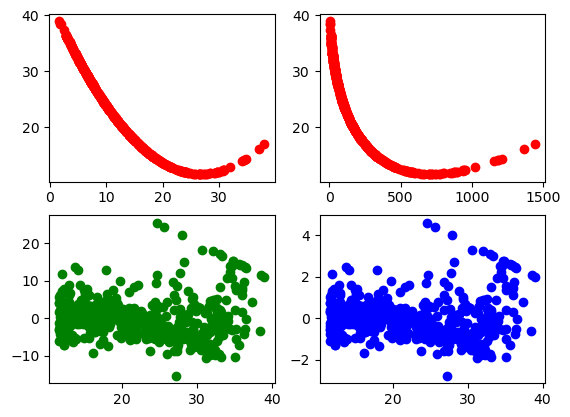

In [31]:
fig, ((ax1, ax2), (ax3, ax4))= plt.subplots(2, 2)
ax1.plot(boston.lstat, lm_order2.predict(),'ro')
ax2.plot(boston.lstat ** 2.0, lm_order2.predict(),'ro')
ax3.plot(lm_order2.predict(), lm_order2.resid, 'go')
ax4.plot(lm_order2.predict(), lm_order2.resid_pearson, 'bo')
plt.show()

In [35]:
# Performing an ANOVA (analysis of variance) test to compare the two regression models 
# The anova_lm function from the statsmodels module is used to calculate the ANOVA table, which contains information about the sums of squares, degrees of freedom, F-statistic, and p-value for each model. 
# The table provides information about whether the addition of the quadratic term in lm_order2 significantly improves the fit of the model compared to lm_order1

table = sm.stats.anova_lm(lm_order1, lm_order2)
print(table)

   df_resid           ssr  df_diff     ss_diff           F        Pr(>F)
0     504.0  19472.381418      0.0         NaN         NaN           NaN
1     503.0  15347.243158      1.0  4125.13826  135.199822  7.630116e-28


In [34]:
lm_log = smf.ols('medv~ np.log(rm)', data=boston).fit()
lm_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.22e-64
Time:                        20:43:19   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 6 Qualitative predictors

In [36]:
carseats = pd.read_csv('data/Carseats.csv', header = 0)

In [37]:
list(carseats)

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [38]:
carseats.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [39]:
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [40]:
lm_carseats = smf.ols('Sales ~ Income + Advertising + Price + Age', data = carseats).fit()

In [41]:
lm_carseats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.371
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     58.21
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           1.33e-38
Time:                        20:48:37   Log-Likelihood:                -889.67
No. Observations:                 400   AIC:                             1789.
Df Residuals:                     395   BIC:                             1809.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.1829      0.777     19.542      0.000      13.656      16.710
Income          0.0108      0.004      2.664      0.008       0.003       0.019
Advertising     0.1203      0.017      7.078      0.000       0.087       0.154
Price          -0.0573      0.005    -11.932      0.000      -0.067      -0.048
Age            -0.0486      0.007     -6.956      0.000      -0.062      -0.035
==============================================================================
Omnibus:                        3.285   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.194   Jarque-Bera (JB):                3.336
Skew:                           0.218   Prob(JB):                        0.189
Kurtosis:                       2.903   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1]:
# creating dummy variables using get_dummies
ShelveLoc_dummies = pd.get_dummies(carseats.ShelveLoc, prefix='ShelveLoc').iloc[:,1:]

NameError: name 'pd' is not defined

In [43]:
carseats_dummy = pd.concat([carseats, ShelveLoc_dummies], axis=1)
carseats_dummy.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,ShelveLoc_Good,ShelveLoc_Medium
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,0,0
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1,0
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,0,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0,1
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0,0


In [44]:
# now using the dummy variables for ShelveLoc to create the multiple linear regression model
lm_carseats_dummy = smf.ols('Sales ~ Income + Advertising + Price + Age + ShelveLoc_Good + ShelveLoc_Medium', data = carseats_dummy).fit()

In [45]:
lm_carseats_dummy.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     158.3
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          1.33e-101
Time:                        20:51:48   Log-Likelihood:                -736.58
No. Observations:                 400   AIC:                             1487.
Df Residuals:                     393   BIC:                             1515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           13.4006      0.545     24.575      0.000      12.329      14.473
Income               0.0136      0.003      4.891      0.000       0.008       0.019
Advertising          0.1057      0.012      9.076      0.000       0.083       0.129
Price               -0.0606      0.003    -18.436      0.000      -0.067      -0.054
Age                 -0.0498      0.005    -10.401      0.000      -0.059      -0.040
ShelveLoc_Good       4.8756      0.230     21.175      0.000       4.423       5.328
ShelveLoc_Medium     2.0046      0.189     10.590      0.000       1.632       2.377
==============================================================================
Omnibus:                        0.402   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.818   Jarque-Bera (JB):                0.422
Skew:                           0.076   Prob(JB):                        0.810
Kurtosis:                       2.955   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# showing how to do the same thing as above, but using the built-in C() function to indicate that ShelveLoc is a categorical variable

lm_carseats_wo_dummy = smf.ols('Sales ~ Income + Advertising + Price + Age + C(ShelveLoc)', data = carseats).fit() 
lm_carseats_wo_dummy.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     158.3
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          1.33e-101
Time:                        20:55:00   Log-Likelihood:                -736.58
No. Observations:                 400   AIC:                             1487.
Df Residuals:                     393   BIC:                             1515.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 13.4006      0.545     24.575      0.000      12.329      14.473
C(ShelveLoc)[T.Good]       4.8756      0.230     21.175      0.000       4.423       5.328
C(ShelveLoc)[T.Medium]     2.0046      0.189     10.590      0.000       1.632       2.377
Income                     0.0136      0.003      4.891      0.000       0.008       0.019
Advertising                0.1057      0.012      9.076      0.000       0.083       0.129
Price                     -0.0606      0.003    -18.436      0.000      -0.067      -0.054
Age                       -0.0498      0.005    -10.401      0.000      -0.059      -0.040
==============================================================================
Omnibus:                        0.402   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.818   Jarque-Bera (JB):                0.422
Skew:                           0.076   Prob(JB):                        0.810
Kurtosis:                       2.955   Cond. No.                     1.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""